In [2]:
import pandas as pd
import numpy as np



In [157]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
import tsubaki
query = ''
query += 'select * from trading.bf_fx_ticker_btc_jpy ' \
         'where _PARTITIONTIME >= "2018-05-18 00:00" ' \
         'AND _PARTITIONTIME < "2018-05-19 00:00" ' \
         'order by timestamp;'     
print(query)


select * from trading.bf_fx_ticker_btc_jpy where _PARTITIONTIME >= "2018-05-18 00:00" AND _PARTITIONTIME < "2018-05-19 00:00" order by timestamp;


In [153]:
ticker = pd.read_gbq(query, tsubaki.PROJECT_ID)


Requesting query... 

ok.


Job ID: 48b2e61e-3752-4e78-a3d5-5a342092f9dd
Query running...


Query done.
Processed: 23.4 MB Billed: 24.0 MB


Standard price: $0.00 USD



Retrieving results...


Got 245341 rows.



Total time taken 66.89 s.
Finished at 2018-05-20 23:44:02.


In [7]:
import pandas
ticker: pandas.core.frame.DataFrame
ticker["spread"] = ticker.best_ask-ticker.best_bid

In [8]:
best_ask = ticker["best_ask"].values
best_bid = ticker["best_bid"].values
timestamps = ticker["timestamp"].values


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

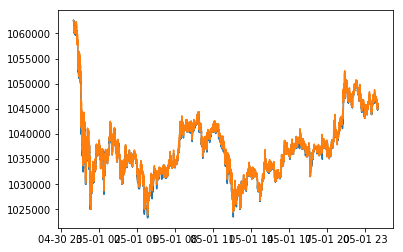

In [10]:
plt.plot(timestamps, best_bid)
plt.plot(timestamps, best_ask)


[[ 1.         -0.10806297]
 [-0.10806297  1.        ]]
[[1.         0.05424114]
 [0.05424114 1.        ]]


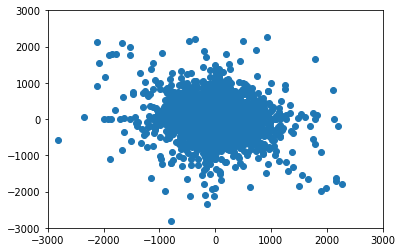

In [141]:

def downsample(values, step=1):
    n = values.size
    index = np.arange(n/step,dtype=int) * step
    return values[index]

def autocorr(values):
    res = np.correlate(values, values, mode='full')[:]
    print("aaa")
    print(res.shape)
    return res[int(res.size/2)+1:]

def plot_diff(timestamps, values, step=1):
    t = downsample(timestamps, step)
    v = downsample(values, step)
    prev = v[:-1]
    succ = v[1:]
    diff = succ - prev
    #plt.plot(t[1:], succ - prev)
    
    plt.scatter(diff[:-1], diff[1:])
    r=3000
    plt.xlim(-r,r)
    plt.ylim(-r,r)
    
    print(np.corrcoef(diff[:-1], diff[1:]))
    print(np.corrcoef(diff[:-2], diff[2:]))
    #ac = autocorr(diff)[:20]
    #plt.plot(ac)
    
    
step = 7
#plot_diff(ask_ticker["timestamp"].values, ask_ticker["best_ask"].values, step)
plot_diff(bid_ticker["timestamp"].values, bid_ticker["best_bid"].values, step)


#start=0
#n=100
#plt.plot(best_ask_diff[start:start+n])
#plt.plot(best_bid_diff[start:start+n])
#plt.plot(ticker["spread"][start:start+n])


In [82]:
def plot_timediff_hist(ticker):
    timestamps = ticker["timestamp"].values
    timedeltas = (timestamps[1:]-timestamps[:-1]).astype(float)
    timedeltas = timedeltas / 1000.0 / 1000 / 1000
    timedeltas_under2 = timedeltas[timedeltas < 2.0]
    plt.hist(timedeltas_under2,bins=30)


## 上がり幅、下がり幅の分布

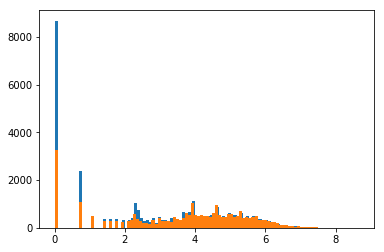

In [22]:
def plot_diff_hist(values):
    diffs = values[1:] - values[:-1]
    plt.hist(np.log(-diffs[diffs < 0]), bins=100)
    plt.hist(np.log(diffs[diffs > 0]), bins=100)
    
plot_diff_hist(best_ask)    


In [23]:
best_ask[0], best_bid[0]

(1062617.0, 1062605.0)

In [77]:
prev_ticker = ticker.shift(1)
ask_diff = ticker["best_ask"] - prev_ticker["best_ask"]
bid_diff = ticker["best_bid"] - prev_ticker["best_bid"]
is_ask = ask_diff != 0
is_bid = bid_diff != 0
ticker["ask_diff"] = ask_diff
ticker["bid_diff"] = bid_diff
ticker["is_ask"] = is_ask
ticker["is_bid"] = is_bid

print(ticker[:5])

ticker=ticker.loc[1:]

                   timestamp   best_ask   best_bid  best_ask_size  \
0 2018-05-01 00:00:50.248251  1062617.0  1062605.0       0.881999   
1 2018-05-01 00:00:50.560742  1062617.0  1062605.0       0.881999   
2 2018-05-01 00:00:50.873232  1062616.0  1062605.0       1.100000   
3 2018-05-01 00:00:50.998231  1062617.0  1062605.0       0.781999   
4 2018-05-01 00:00:51.623200  1062617.0  1062605.0       0.781999   

   best_bid_size  total_ask_depth  total_bid_depth  tick_id  \
0          0.452      9778.311675      8998.513056  7167450   
1          0.452      9772.711674      8998.999056  7167461   
2          0.452      9778.711675      9000.813056  7167471   
3          0.452      9777.721669      8884.853056  7167485   
4          0.452      9778.007670      8883.328056  7167489   

   volume_by_product        volume product_code                received_at  \
0       64205.413903  64205.413903   FX_BTC_JPY 2018-05-01 00:00:53.787251   
1       64205.413903  64205.413903   FX_BTC_JPY 20

In [79]:
ask_ticker = ticker.loc[ticker["is_ask"]]
bid_ticker = ticker.loc[ticker["is_bid"]]

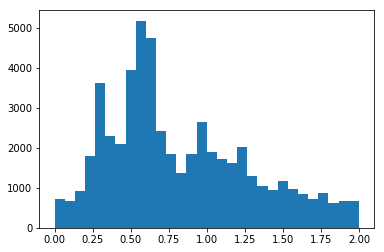

In [83]:
plot_timediff_hist(ask_ticker)

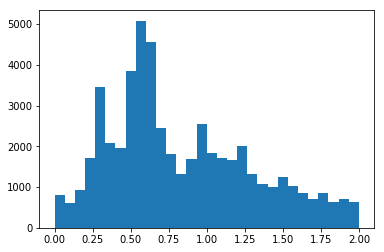

In [84]:
plot_timediff_hist(bid_ticker)

In [161]:
ticker.to_pickle("ticker-2018-05-18.pkl")

In [159]:
import tsubaki.preprocessing.ticker as tick
tick.plus1(10)


11